## Exploratory Data Analysis with Kaggle 

Earlier this month, I did a Facebook Live Code Along Session in which I (and everybody who coded along) built several algorithms of increasing complexity that predict whether any given passenger on the Titanic survived or not, given data on them such as the fare they paid, where they embarked and their age. 

In this post, you will go over some of the things we covered in this session. If you want to re-watch or follow this post together with the video, you can watch it here:

In [2]:
import IPython
iframe = '<iframe src="https://www.facebook.com/plugins/video.php?href=https%3A%2F%2Fwww.facebook.com%2F726282547396228%2Fvideos%2F1834105493280589%2F&show_text=0&width=560" width="560" height="315" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allowFullScreen="true"></iframe>'
IPython.display.HTML(iframe)

In particular, you might still remember that we built supervised learning models. 

Supervised learning is the branch of Machine Learning (ML) that involves predicting labels, such as 'Survived' or 'Not'. Such models learn from labelled data, which is data that includes whether a passenger survived (called "model training"), and then predict on unlabelled data.

On Kaggle, a platform for predictive modelling and analytics competitions, these are called train and test sets because

* You want to build a model that learns patterns in the training set, and
* You then use the model to make predictions on the test set.

Kaggle then tells you the **percentage that you got correct**: this is known as the accuracy of your model.

## How To Start with Supervised Learning

As you might already know, a good way to approach supervised learning is the following:

* Perform an Exploratory Data Analysis (EDA) on your data set;
* Build a quick and dirty model, or a baseline model, which can serve as a comparison against later models that you will build;
* Iterate this process. You will do more EDA and build another model;
* Engineer features: take the features that you already have and combine them or extract more information from them to eventually come to the last point, which is
* Get a model that performs better.

In this code along session, you did or will do all of these steps! 

**Note** that we also have free courses that get you up and running with machine learning for the Titanic dataset in [Python](https://campus.datacamp.com/courses/kaggle-python-tutorial-on-machine-learning) and [R](https://campus.datacamp.com/courses/kaggle-r-tutorial-on-machine-learning).

## Import Your Data and Check it Out

A first step is always to import your data to quickly check out the data that you will be working with. In this case, you'll import the `pandas` package and make use of the `read_csv()` function to read in the data:

**Note** that in the code chunks below, other packages and modules of packages such as `matplotlib`, `sklearn` and `seaborn` have already been imported. You'll be making more extensive use of these later for (statistical) data visualization and machine learning purposes!

You also make use of IPython magic command `%matplotlib inline` so that your plots appear inline in your notebook. You also add `sns.set()` to your code chunk to change the visualization style to a base Seaborn style:

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

Without further ado, let's import the data and already take the first step in examining your data:

In [3]:
# Import test and train datasets
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

# View first lines of training data
df_train.head(n=4)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

If you want to see what all of these features are, check out the Kaggle data documentation [here](https://www.kaggle.com/c/titanic/data).

Before you continue, it's good to take into account the following when it comes to terminology: 
* The target variable is the variable you are trying to predict;
* Other variables are known as "features" (or "predictor variables", the features that you're using to predict the target variable).

With this in mind, you can continue to check out your data with, for example, the `head()` function, which you can use to pull up the first five rows of your data set:

In [4]:
# View first lines of test data
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Note that the `df_test` DataFrame doesn't have the `'Survived'` column because this is what you will try to predict!

* You can also use the DataFrame `.info()` method to check out data types, missing values and more (of `df_train`).

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In this case, you see that there are only 714 non-null values for the 'Age' column in a DataFrame with 891 rows. This means that are are 177 null _or_ missing values.

* Also, use the DataFrame `.describe()` method to check out summary statistics of numeric columns (of `df_train`).

In [6]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Visual Exploratory Data Analysis (EDA) And Your First Model

Now that you have an idea about what your data looks like and have checked out some statistics, it's time to also visualize your data with the help of the `seaborn` package: 

* For example, use `seaborn` to build a bar plot of Titanic survival, which is your target variable.

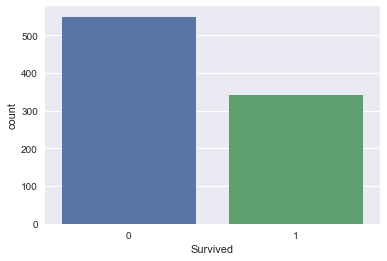

In [7]:
sns.countplot(x='Survived', data=df_train);

**Take-away:** in the training set, less people survived than didn't. Let's then build a first model that predicts that nobody survived.

This is a bad model as you know that people survived. But it gives us a baseline: any model that we build later needs to do better than this one.

You can do this by following these steps:

* Create a column `'Survived'` for `df_test` that encodes 'did not survive' for all rows;
* Save `'PassengerId'` and `'Survived'` columns of `df_test` to a .csv and submit to Kaggle.

In [8]:
df_test['Survived'] = 0
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/no_survivors.csv', index=False)

What accuracy did this give you? The accuracy on Kaggle is 62.7.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1513867360/Screen_Shot_2017-12-21_at_15.41.40_ymf0dk.png"/>

Not too bad!

**Essential note!** You will also want to use metrics other than accuracy!

## EDA on Feature Variables

Now that you have made a quick-and-dirty model, it's time to reiterate: let's do some more Exploratory Data Analysis and build another model soon! 

* You can use `seaborn` to build a bar plot of the Titanic dataset feature `'Sex'` (of `df_train`).

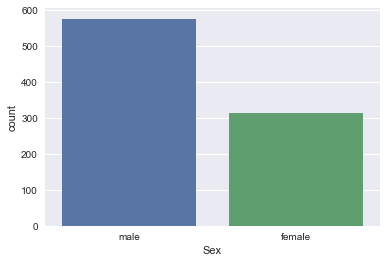

In [8]:
sns.countplot(x='Sex', data=df_train);

* Also, use `seaborn` to build bar plots of the Titanic dataset feature `'Survived'` split (faceted) over the feature `'Sex'`.

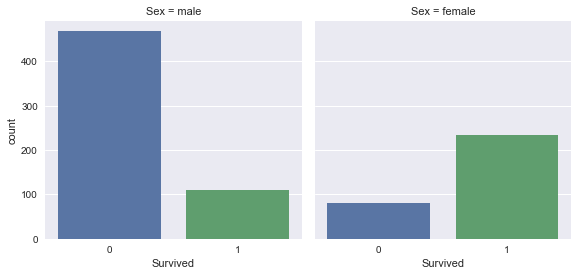

In [9]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

**Take-away:** Women were more likely to survive than men.

* With this take-away, you can use `pandas` to figure out how many women and how many men survived:

In [10]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

* Use `pandas` to figure out the proportion of women that survived, along with the proportion of men:

In [11]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.742038216561
0.188908145581


74% of women survived, while 19% of men survived.

Let's now build a second model and predict that all women survived and all men didn't. Once again, this is an unrealistic model, but it will provide a baseline against which to compare future models.

* Create a column `'Survived'` for `df_test` that encodes the above prediction.
* Save `'PassengerId'` and `'Survived'` columns of `df_test` to a .csv and submit to Kaggle.

In [12]:
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1

In [14]:
df_test[['PassengerId', 'Survived']].to_csv('../data/predictions/women_survive.csv', index=False)

Now, what accuracy did this model give you when you submit it to Kaggle?

The accuracy on Kaggle is 76.6%:

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1513868121/Screen_Shot_2017-12-21_at_15.54.59_woeqjm.png"/>

With this submission, you went up about 2,000 places in the leaderboard! Also, you have improved your score, so you've done a great job!

## Explore Your Data More!

* Use `seaborn` to build bar plots of the Titanic dataset feature `'Survived'` split (faceted) over the feature `'Pclass'`.

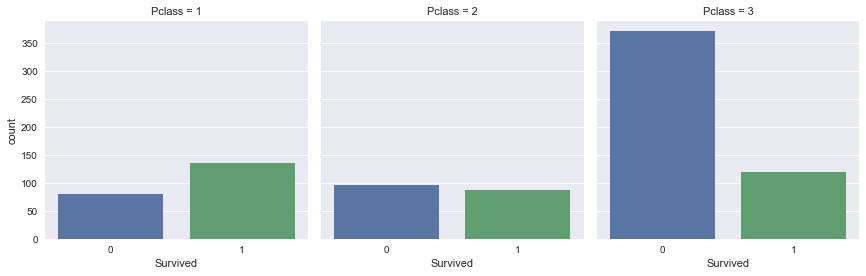

In [24]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);

**Take-away:** Passengers that travelled in first class were more likely to survive. On the other hand, passengers travelling in third class were more unlikely to survive. 

* Use `seaborn` to build bar plots of the Titanic dataset feature `'Survived'` split (faceted) over the feature `'Embarked'`.

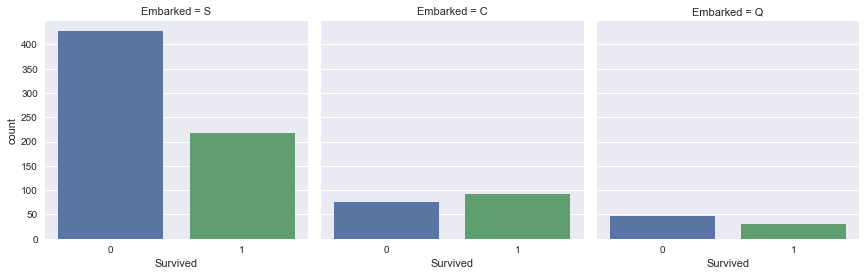

In [23]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train);

**Take-away:** Passengers that embarked in Southampton were less likely to survive. 

## EDA with Numeric Variables

* Use `seaborn` to plot a histogram of the `'Fare'` column of `df_train`.

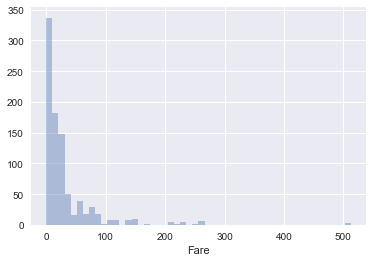

In [31]:
sns.distplot(df_train.Fare, kde=False);

**Take-away:** Most passengers paid less than 100 for travelling with the Titanic.

* Use a `pandas` plotting method to plot the column `'Fare'` for each value of `'Survived'` on the same plot.

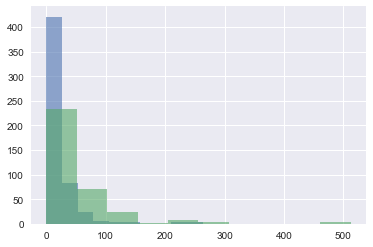

In [29]:
df_train.groupby('Survived').Fare.hist(alpha=0.6);

**Take-away:** It looks as though those that paid more had a higher chance of surviving.

* Use `seaborn` to plot a histogram of the `'Age'` column of `df_train`. You'll need to drop null values before doing so.

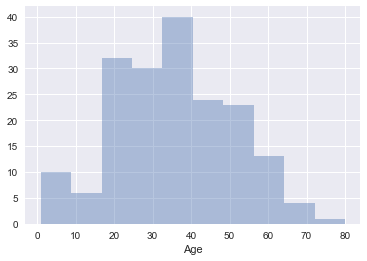

In [32]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

* Plot a strip plot & a swarm plot of `'Fare'` with `'Survived'` on the x-axis.

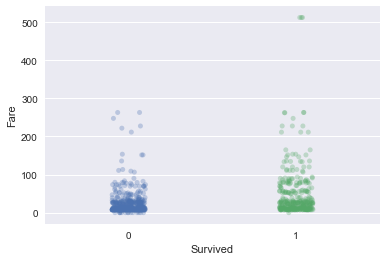

In [37]:
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True);

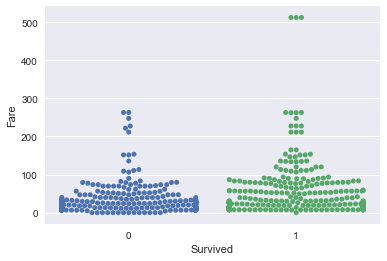

In [38]:
sns.swarmplot(x='Survived', y='Fare', data=df_train);

**Take-away:** Fare definitely seems to be correlated with survival aboard the Titanic.

* Use the DataFrame method `.describe()` to check out summary statistics of `'Fare'` as a function of survival.

In [39]:
df_train.groupby('Survived').Fare.describe()

count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

* Use `seaborn` to plot a scatter plot of `'Age'` against `'Fare'`, colored by `'Survived'`.

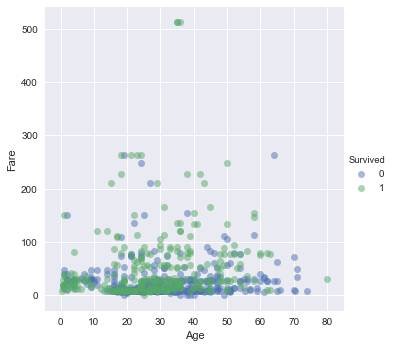

In [46]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

**Take-away:** It looks like those who survived either paid quite a bit for their ticket or they were young.

* Use `seaborn` to create a pairplot of `df_train`, colored by `'Survived'`. A pairplot is a great way to display most of the information that you have already discovered in a single grid of plots.

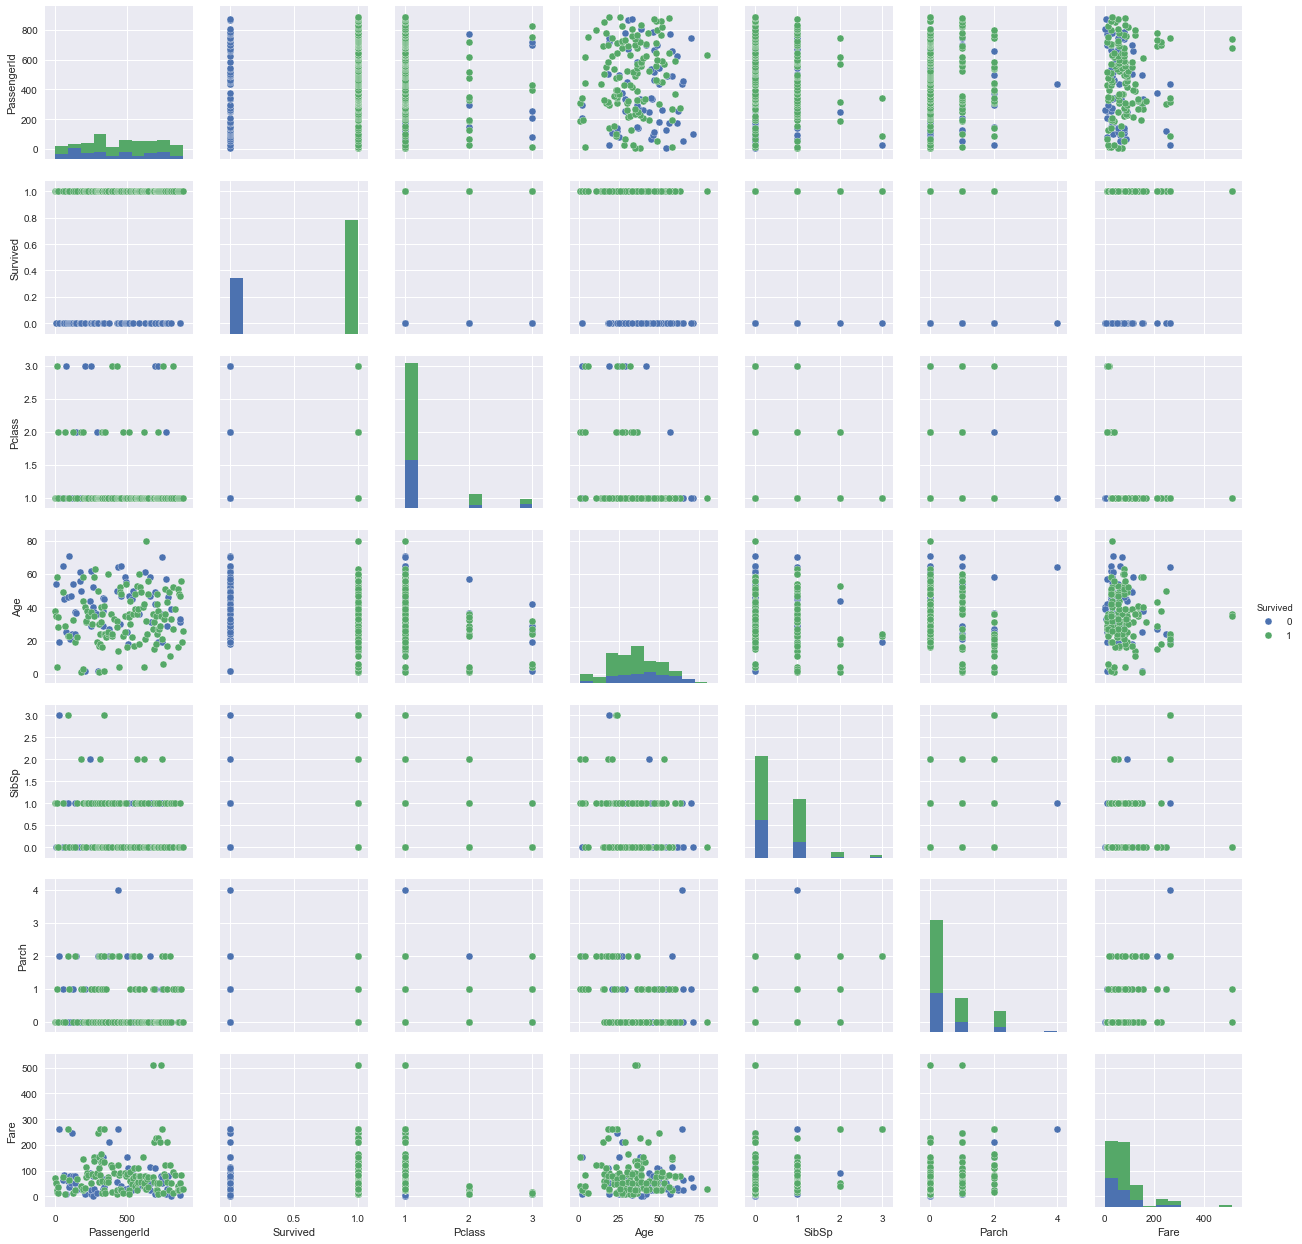

In [47]:
sns.pairplot(df_train_drop, hue='Survived');

## From EDA to Machine Learning Model

In this tutorial, you have successfully:
* loaded our data and had a look at it.
* explored our target variable visually and made your first predictions.
* explored some of our feature variables visually and made more predictions that did better based on our EDA.
* done some serious EDA of feature variables, categorical and numeric.

In the next post, you'll take the time to build some Machine Learning models, based on what you've learnt from your EDA here. We'll do this in the next post on this project (to be launched on December 27).